In [4]:
! pip install matplotlib
! pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv("C:\\Users\\CVR\\Desktop\\project_6635\\inventory_data_noisy.csv")
data

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [6]:
data.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [7]:
data.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [8]:
data['Quantity']=data['Quantity'].fillna(data['Quantity'].mean)
data['Consumption']=data['Consumption'].fillna(data['Consumption'].median)
data['Location']=data['Location'].fillna(data['Location'].mode()[0])

In [9]:
data.isnull().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [10]:
data.drop_duplicates()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,<bound method Series.mean of 0 62.0\n1 ...,<bound method Series.median of 0 8.0\n...,New York
18264,D001,P010,2022-01-27,26.0,18.0,Chicago
18328,D001,P014,2022-01-14,30.0,5.0,Chicago
18337,D001,P013,2022-01-26,48.0,15.0,Chicago


In [11]:
data.dtypes

Dealer_ID      object
Product_ID     object
Date           object
Quantity       object
Consumption    object
Location       object
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format="%y-%m-%d", errors='coerce')


In [15]:
data.dtypes

Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity               object
Consumption            object
Location               object
dtype: object

In [16]:
data['Quantity']=pd.to_numeric(data['Quantity'],errors='coerce')
data['Consumption']=pd.to_numeric(data['Consumption'],errors='coerce')

In [17]:
data.dtypes

Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity              float64
Consumption           float64
Location               object
dtype: object

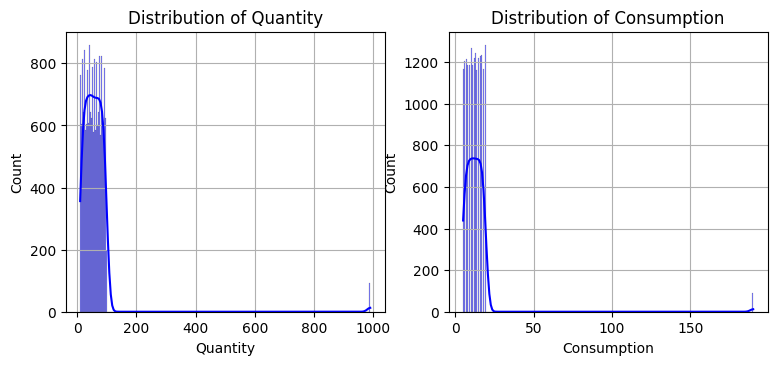

In [36]:
data_eda = data
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(data_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.grid(True)
plt.subplot(2, 3, 2)
sns.histplot(data_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')
plt.grid(True)

Text(0.5, 1.0, 'Boxplot of Consumption')

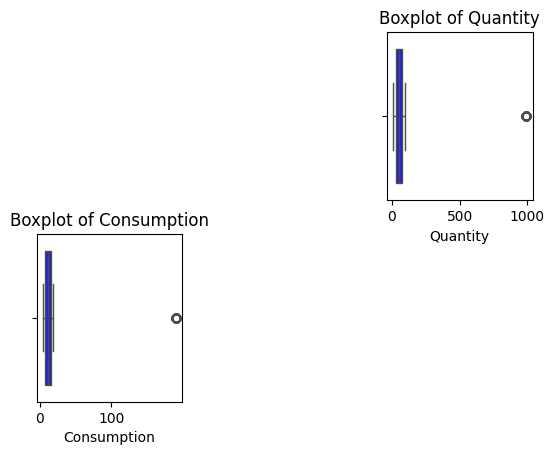

In [38]:
plt.subplot(2, 3, 3)
sns.boxplot(data=data_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=data_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [40]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25) 
        Q3 = data[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
columns_to_filter = ["Quantity", "Consumption"]  
data= remove_outliers_iqr(data, columns_to_filter)

Text(0.5, 1.0, 'Distribution of Consumption')

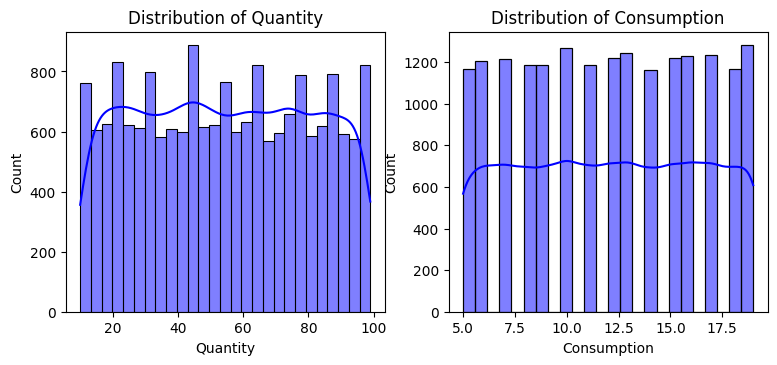

In [42]:
data_eda = data
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(data_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.subplot(2, 3, 2)
sns.histplot(data_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

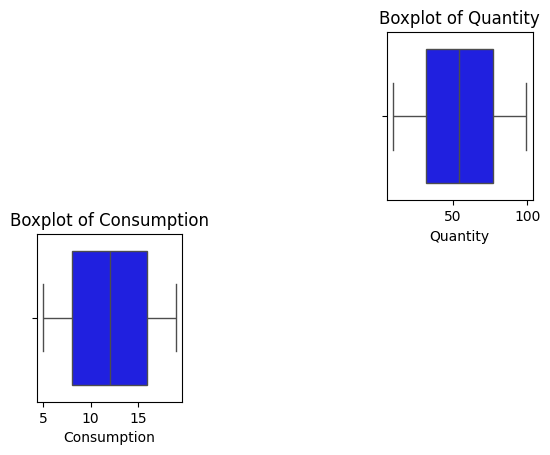

In [43]:
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [44]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(data['Dealer_ID'].unique())
print("Categories in 'Product_ID' variable:  ",end=" ")
print(data['Product_ID'].unique())
print("Categories in'Location' variable:",end=" " )
print(data['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [45]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date', 'Quantity', 'Consumption']

We have 3 categorical features : ['Dealer_ID', 'Product_ID', 'Location']


In [50]:
low_threshold = data["Consumption"].quantile(0.33)
high_threshold = data["Consumption"].quantile(0.66)

In [51]:
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

data["Consumption_Level"] = data["Consumption"].apply(categorize_consumption)

data['Quantity_consumption_ratios'] = data['Quantity']/data['Consumption']







In [53]:
data.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,NaT,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,NaT,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,NaT,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,NaT,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,NaT,57.0,10.0,Los Angeles,Low,5.700000


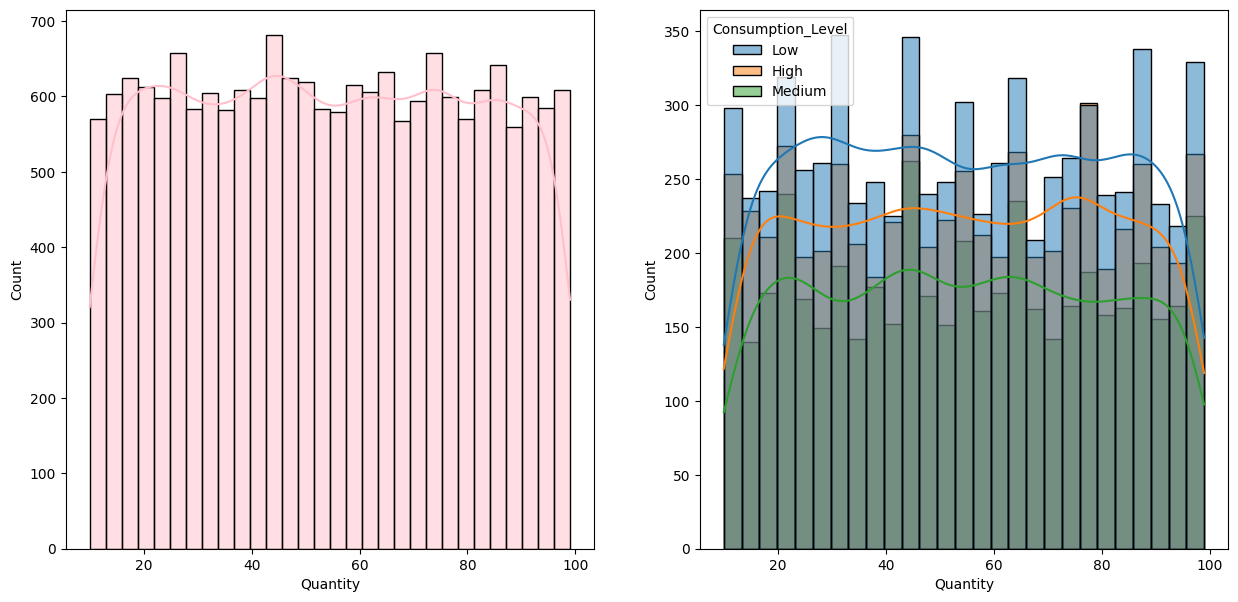

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Quantity',bins=30,kde=True,color='pink')
plt.subplot(122)
sns.histplot(data=data,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

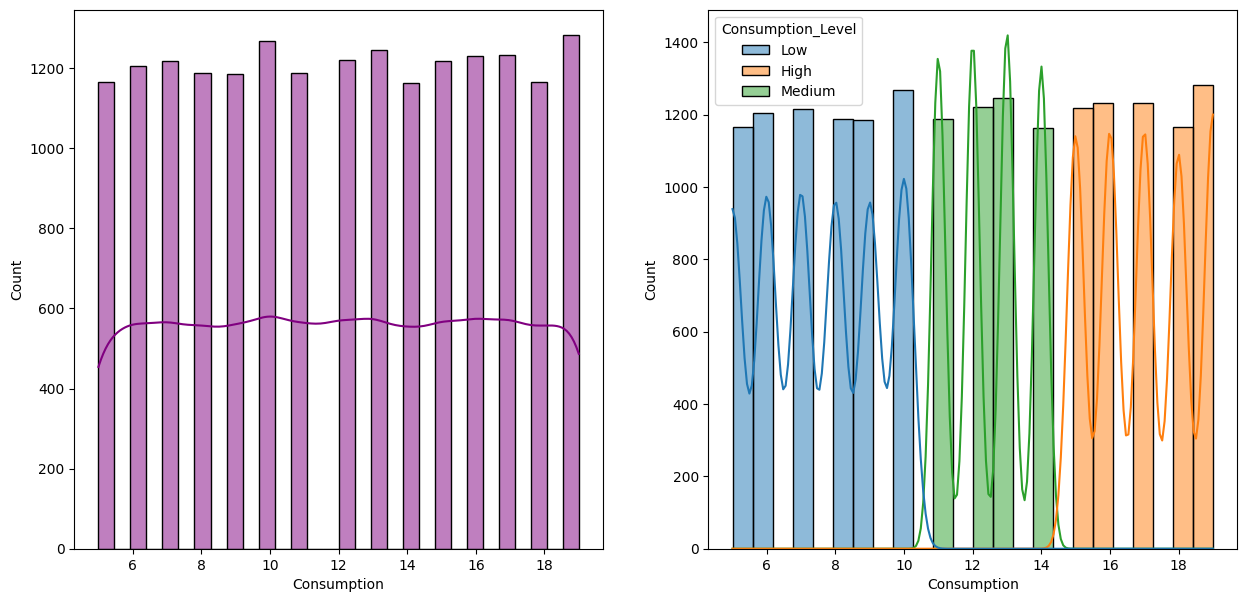

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Consumption',bins=30,kde=True,color='purple')
plt.subplot(122)
sns.histplot(data=data,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

<Axes: xlabel='Quantity', ylabel='Count'>

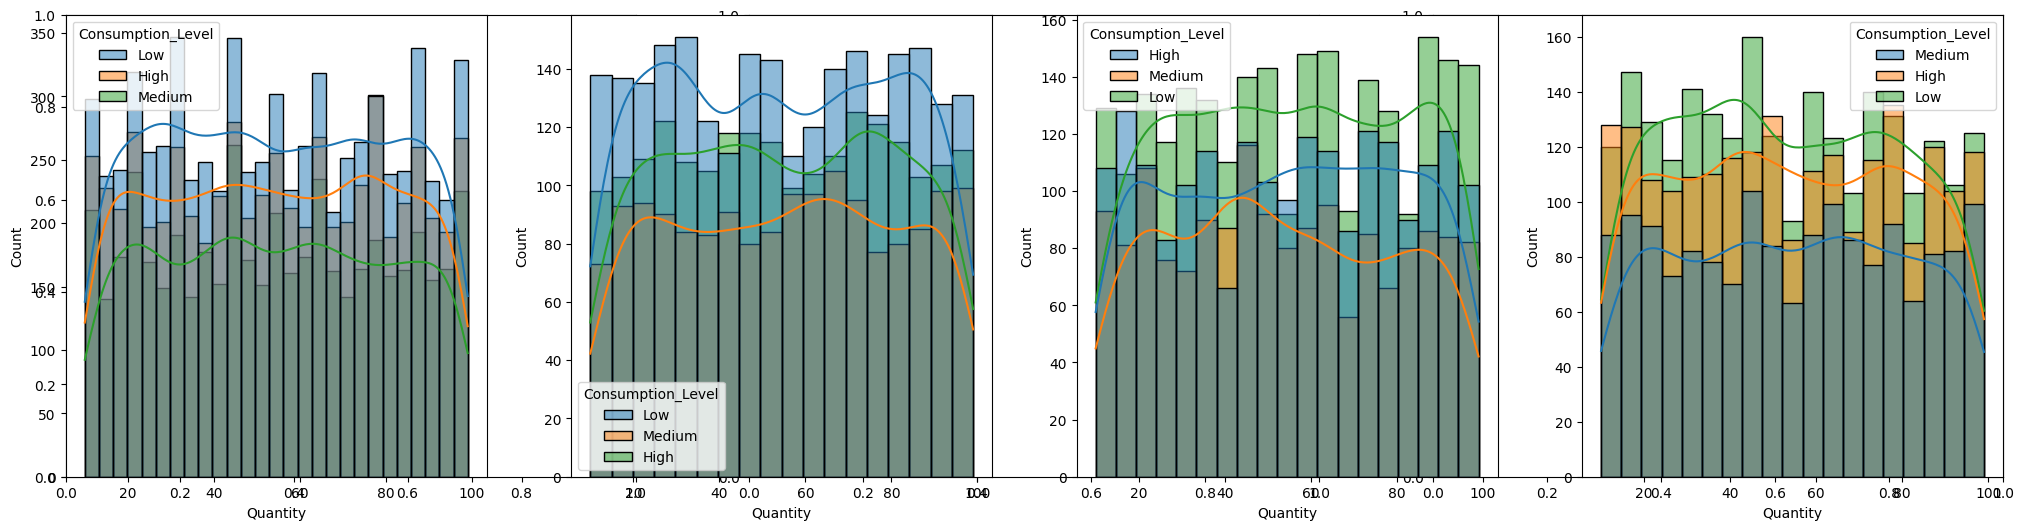

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=data[data.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=data[data.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=data[data.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

C:\Users\CVR\AppData\Local\Temp\ipykernel_8996\2609837646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Location'],data=data,palette ='bright',ax=ax[0],saturation=0.95)


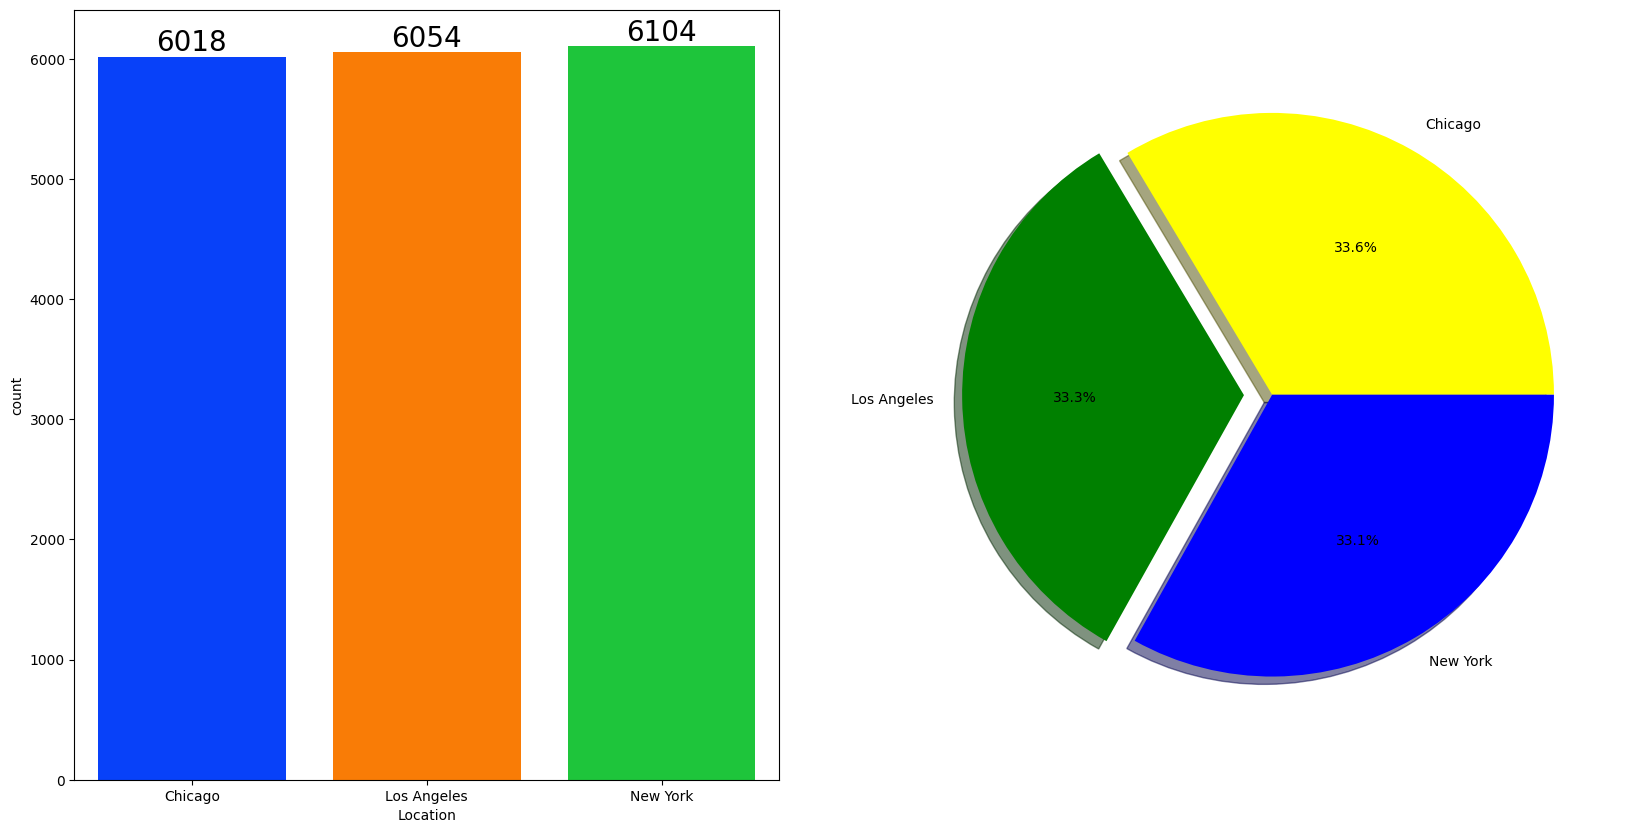

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['Location'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['yellow','green','blue'])
plt.show()

In [64]:
location_group = data.groupby('Location')
location_group

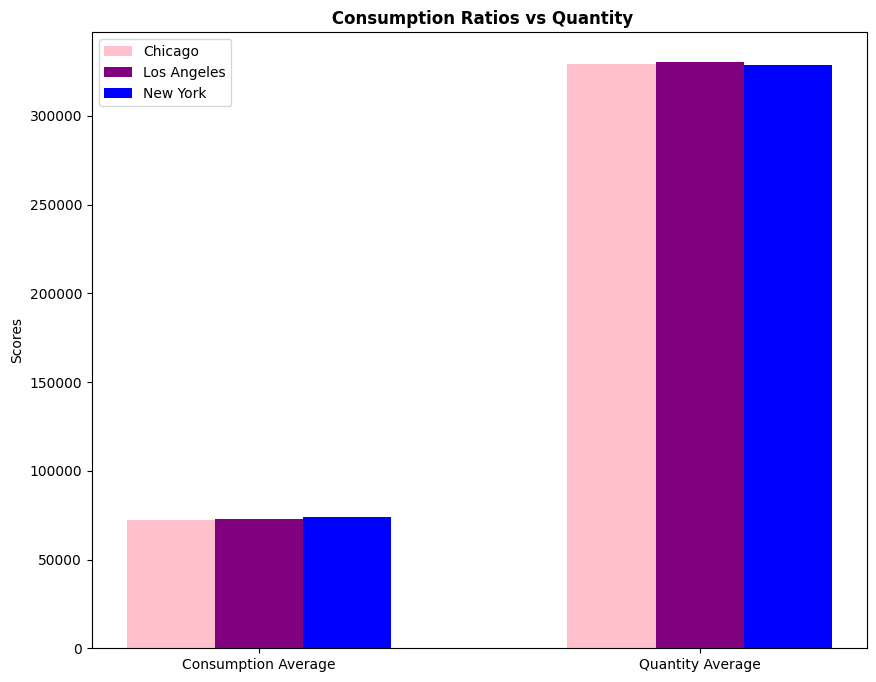

In [72]:
location_group = data.groupby('Location')[['Consumption','Quantity']].sum()
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]
plt.figure(figsize=(10, 8))
X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago',color='pink')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles',color='purple')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York',color='blue')
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')
plt.legend()
plt.show()


C:\Users\CVR\AppData\Local\Temp\ipykernel_8996\3368128023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Dealer_ID'],data=data,palette = 'pastel',ax=ax[0],saturation=0.95)


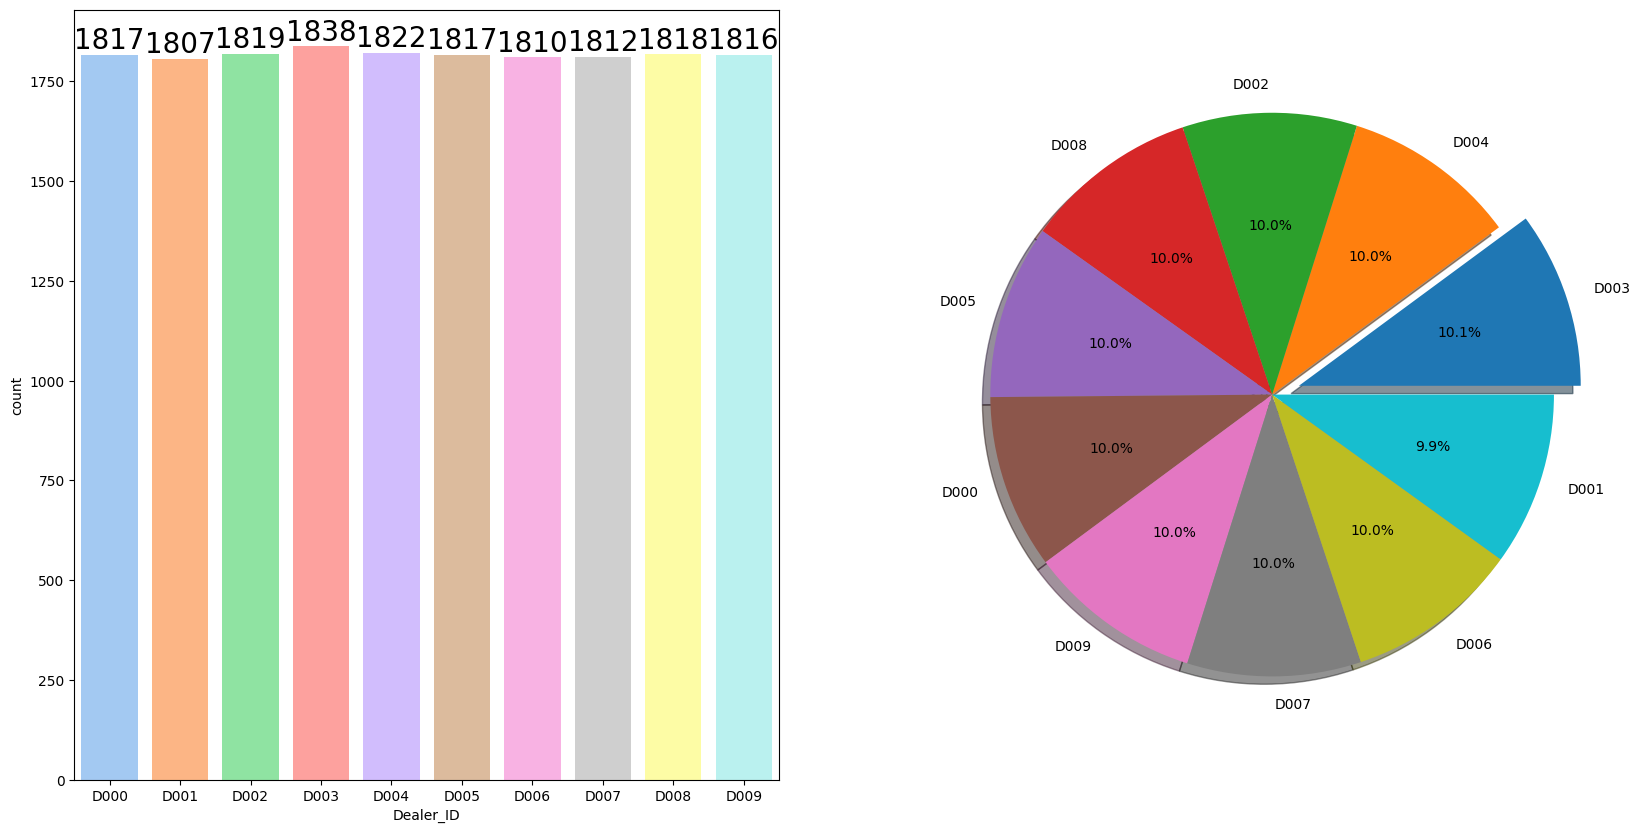

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['Dealer_ID'],data=data,palette = 'pastel',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['Dealer_ID'].value_counts(),labels=data['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

C:\Users\CVR\AppData\Local\Temp\ipykernel_8996\98514610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'bright',ax=ax[0])
C:\Users\CVR\AppData\Local\Temp\ipykernel_8996\98514610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette= 'dark',ax=ax[1])


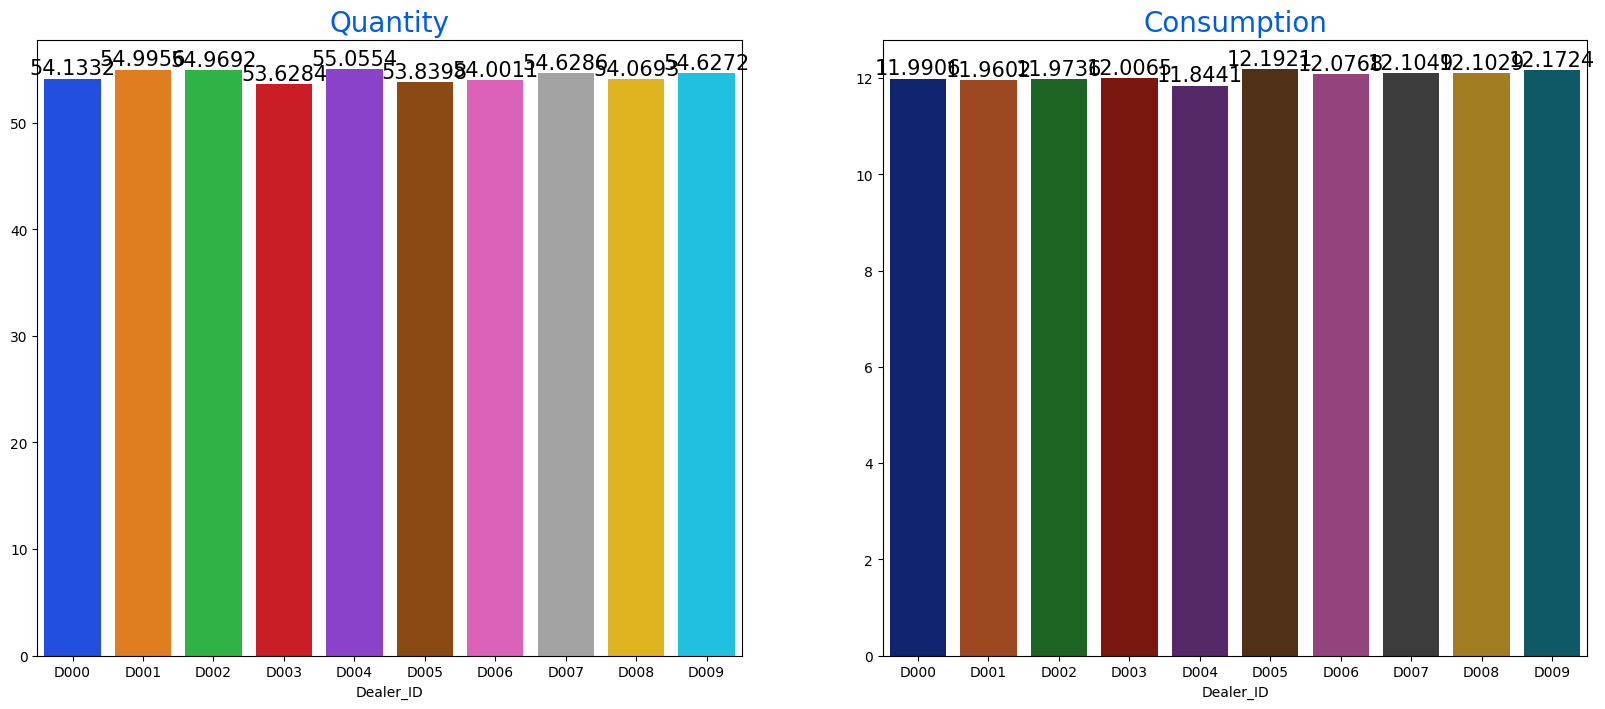

In [78]:
Group_data2=data.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'bright',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette= 'dark',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

C:\Users\CVR\AppData\Local\Temp\ipykernel_8996\3803587880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Product_ID'], palette = 'pastel')


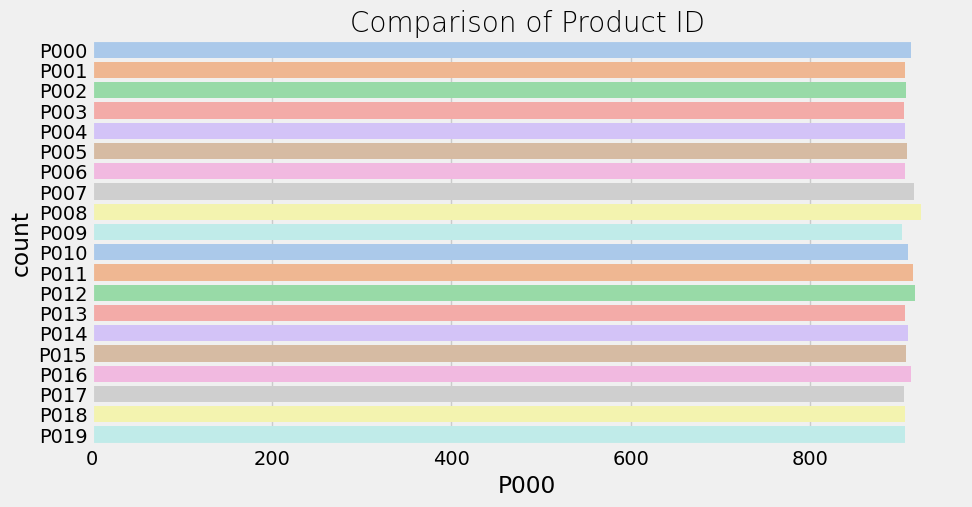

In [83]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(data['Product_ID'], palette = 'pastel')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

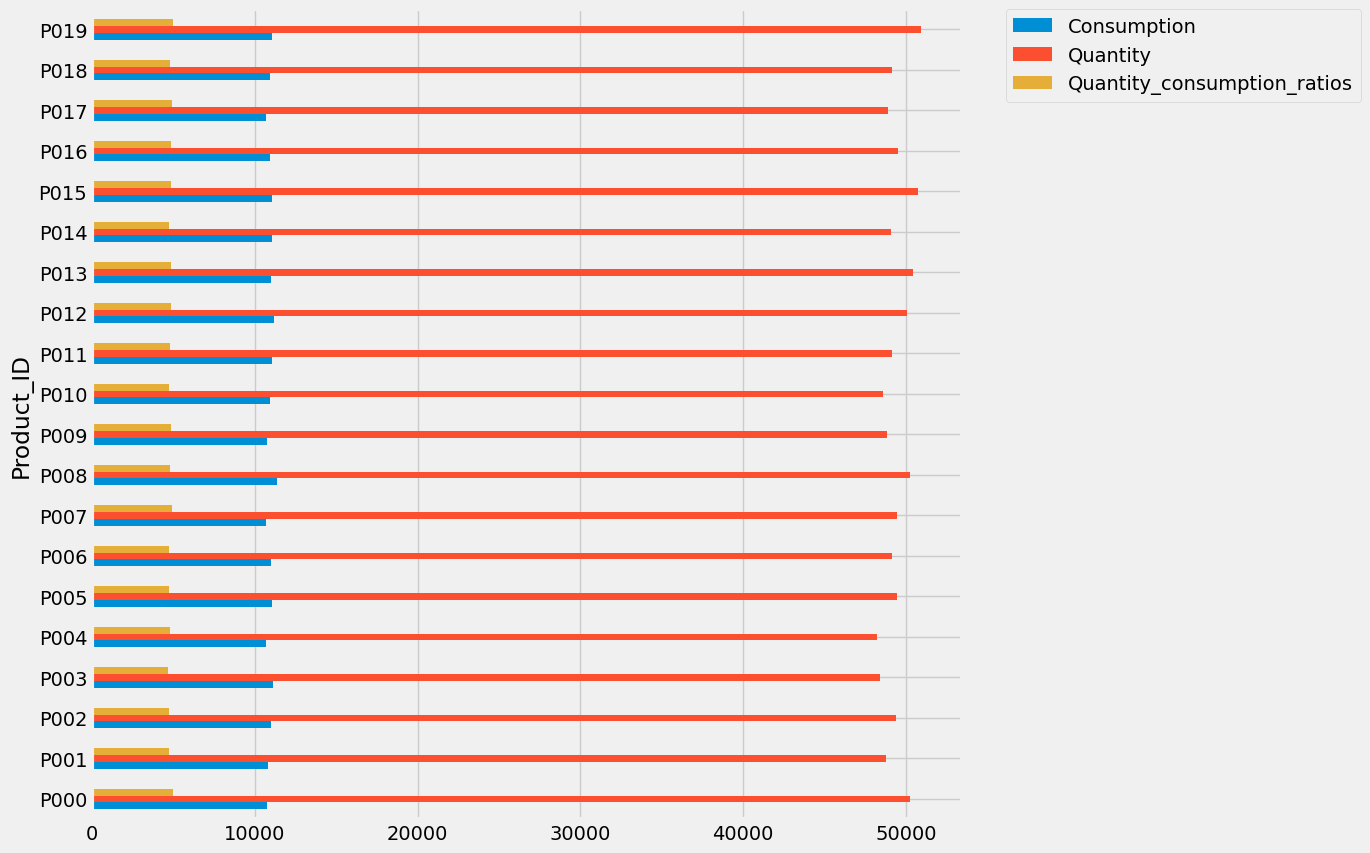

In [88]:
data.groupby('Product_ID')[['Consumption','Quantity','Quantity_consumption_ratios']].agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [86]:
data

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,NaT,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,NaT,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,NaT,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,NaT,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,NaT,57.0,10.0,Los Angeles,Low,5.700000
...,...,...,...,...,...,...,...,...
18355,D001,P012,NaT,71.0,15.0,Los Angeles,High,4.733333
18356,D003,P014,NaT,47.0,12.0,Los Angeles,Medium,3.916667
18357,D001,P013,NaT,89.0,8.0,Chicago,Low,11.125000
18358,D004,P017,NaT,29.0,6.0,New York,Low,4.833333
